## Import required libraries

In [32]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

## Load Dataset

In [4]:
df = pd.read_csv('Iris.csv', index_col = 'Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


## Perform EDA

In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [7]:
df.value_counts()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species        
4.9            3.1           1.5            0.1           Iris-setosa        3
5.8            2.7           5.1            1.9           Iris-virginica     2
               4.0           1.2            0.2           Iris-setosa        1
5.9            3.0           4.2            1.5           Iris-versicolor    1
6.2            3.4           5.4            2.3           Iris-virginica     1
                                                                            ..
5.5            2.3           4.0            1.3           Iris-versicolor    1
               2.4           3.7            1.0           Iris-versicolor    1
                             3.8            1.1           Iris-versicolor    1
               2.5           4.0            1.3           Iris-versicolor    1
7.9            3.8           6.4            2.0           Iris-virginica     1
Name: count, Length: 147, dtype: int64

In [8]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

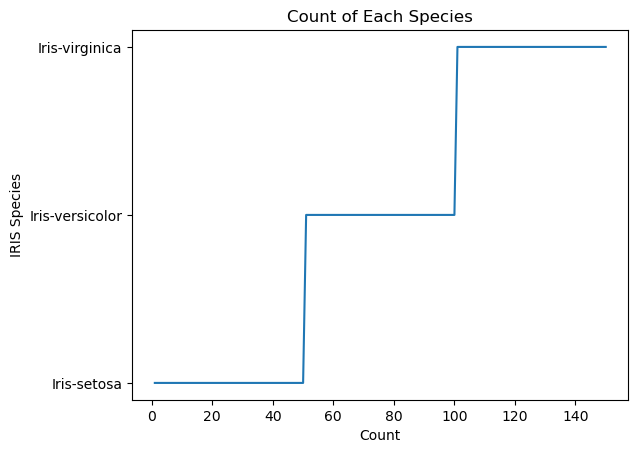

In [9]:
plt.plot(df['Species'])
plt.xlabel("Count")
plt.ylabel("IRIS Species")
plt.title("Count of Each Species")
plt.show()

In [10]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

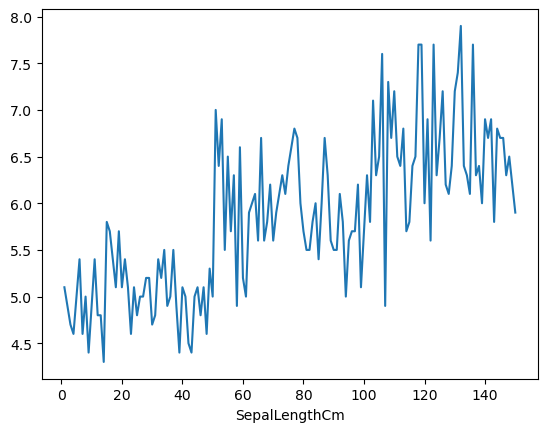

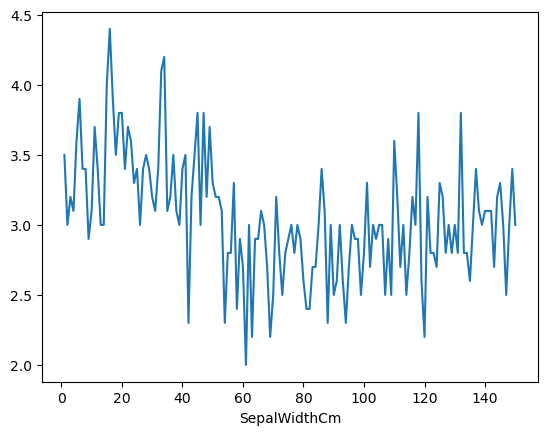

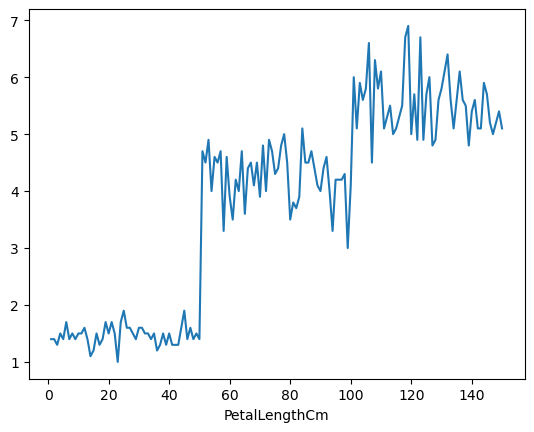

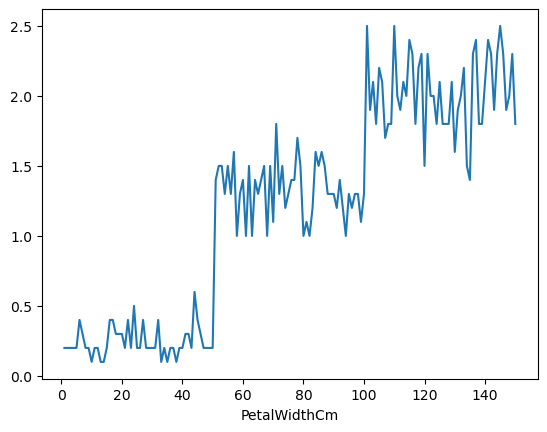

In [11]:
col_para = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
colors = {'Iris-setosa': 'blue', 'Iris-virginica': 'red', 'Iris-versicolor': 'green'}
for i in col_para:
    
    colors = {'Iris-setosa': 'blue', 'Iris-virginica': 'red', 'Iris-versicolor' : 'green'}
    plt.plot(df[i])
    plt.xlabel(i)
    plt.show()
    

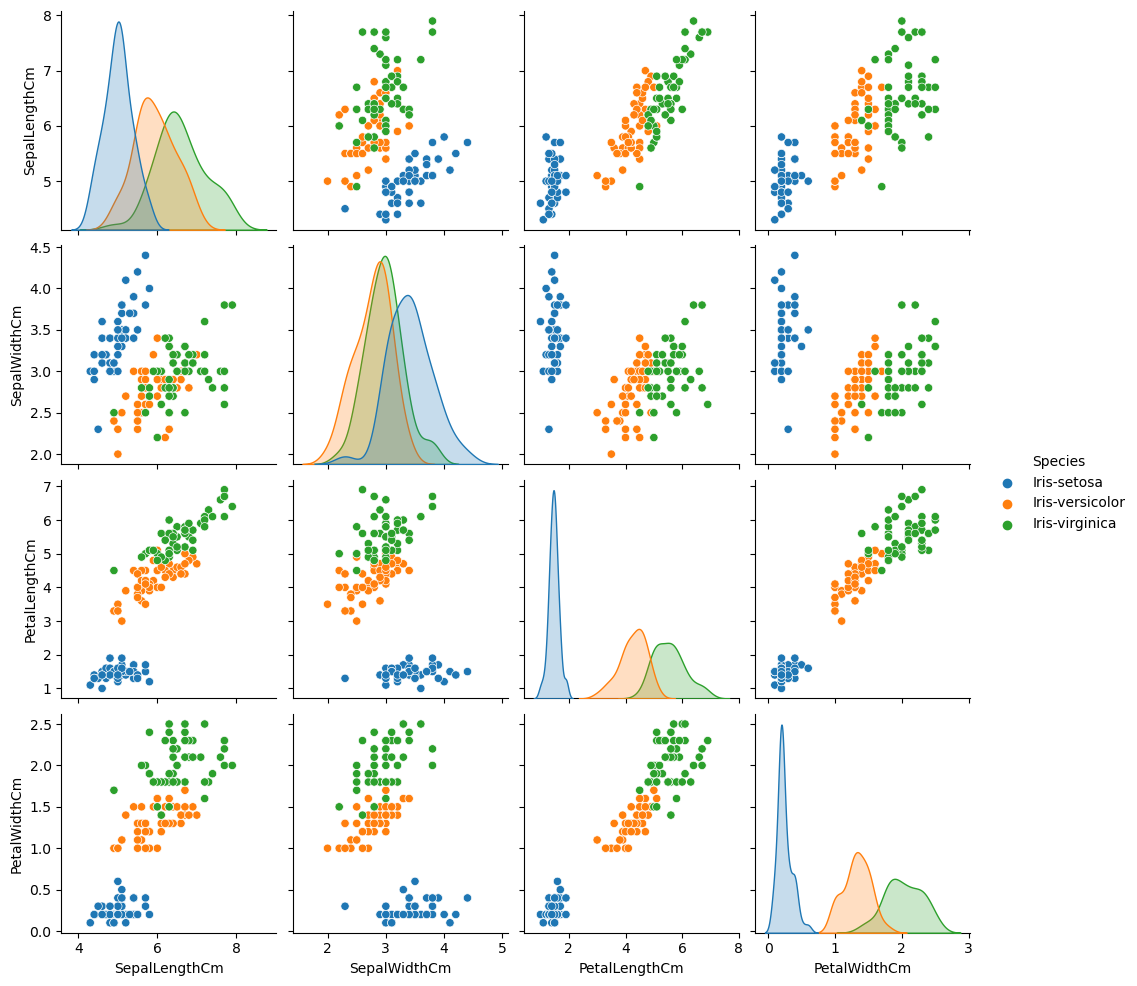

In [12]:
sns.pairplot(df, hue = 'Species')
plt.show()

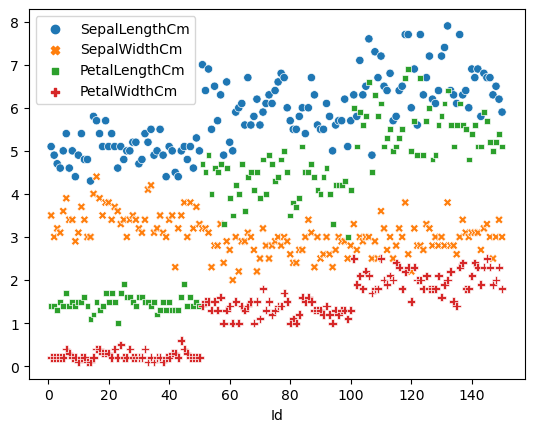

In [13]:
sns.scatterplot(df)
plt.show()

## Split the data into Train and Test data subsets

In [14]:
target = 'Species'
X = df.drop(columns = target)
y = df[target]

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size= 0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


## Model training & evaluation

In [19]:
param_grid = {'max_depth': np.arange(2, 20),
             'max_features': np.arange(2,10)}

In [21]:
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10,verbose=1,n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'max_features': array([2, 3, 4, 5, 6, 7, 8, 9])},
             verbose=1)

In [22]:
grid_search.best_score_

0.9499999999999998

In [23]:
grid_search.best_params_

{'max_depth': 10, 'max_features': 3}

In [24]:
pred_train = grid_search.predict(X_train)

In [25]:
pred_test = grid_search.predict(X_test)

In [28]:
print(classification_report(y_train, pred_train))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       1.00      1.00      1.00        41
 Iris-virginica       1.00      1.00      1.00        39

       accuracy                           1.00       120
      macro avg       1.00      1.00      1.00       120
   weighted avg       1.00      1.00      1.00       120



In [29]:
print(classification_report(y_test, pred_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



## Building tree using the best params

In [30]:
final_model = DecisionTreeClassifier( max_depth = 10, max_features=3)
final_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_features=3)

In [31]:
final_pred = pd.DataFrame( { 'actual':  y_test,
                            'predicted': final_model.predict( X_test ) } )

In [33]:
print(accuracy_score(final_pred.actual, final_pred.predicted))

1.0
